In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
desviacion_estandar_esperada =  np.arange(0, 37, 1).std()
desviacion_estandar_esperada

10.677078252031311

In [44]:
varianza_esperada = np.arange(0, 37, 1).var()
varianza_esperada

114.0

In [45]:
esperanza_matematica_esperada = np.arange(0, 37, 1).mean()
esperanza_matematica_esperada

18.0

In [46]:
cantidad_tiradas = 10000
numero_elegido = 11
tiradas = np.random.randint(0, 37, cantidad_tiradas)
tiradas

array([30,  7, 28, ...,  9,  8,  4])

In [47]:
df = pd.DataFrame()
df['tiradas'] = tiradas
df

,tiradas
0,30
1,7
2,28
3,29
4,5
...,...
9995,1
9996,13
9997,9
9998,8


In [48]:
frec_abs_acumulada = []
frec_rel_acumulada = []
esp_mat_acumulada = []
desv_est_acumulada = []
var_acumulada = []

cantidad_ocurrencias = 0
for index, tirada in enumerate(df['tiradas']):
    if tirada == numero_elegido:
        cantidad_ocurrencias += 1
    frec_abs_acumulada.append(cantidad_ocurrencias)
    frec_rel_acumulada.append(cantidad_ocurrencias/(index+1))
    esp_mat_acumulada.append(np.mean(df['tiradas'][:index+1]))
    desv_est_acumulada.append(np.std(df['tiradas'][:index+1]))
    var_acumulada.append(np.var(df['tiradas'][:index+1]))

df['frec_abs'] = frec_abs_acumulada
df['frec_rel'] = frec_rel_acumulada
df['esp_mat'] = esp_mat_acumulada
df['desv_est'] = desv_est_acumulada
df['var'] = var_acumulada
    

In [49]:
df

,tiradas,frec_abs,frec_rel,esp_mat,desv_est,var
0,30,0,0.000000,30.000000,0.000000,0.000000
1,7,0,0.000000,18.500000,11.500000,132.250000
2,28,0,0.000000,21.666667,10.402991,108.222222
3,29,0,0.000000,23.500000,9.552487,91.250000
4,5,0,0.000000,19.800000,11.303097,127.760000
...,...,...,...,...,...,...
9995,1,260,0.026010,18.143758,10.688430,114.242539
9996,13,260,0.026008,18.143243,10.688019,114.233758
9997,9,260,0.026005,18.142328,10.687876,114.230693
9998,8,260,0.026003,18.141314,10.687823,114.229555


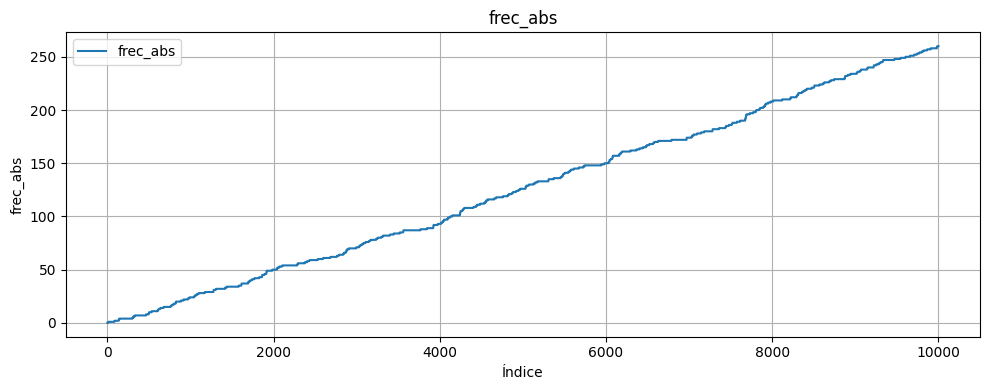

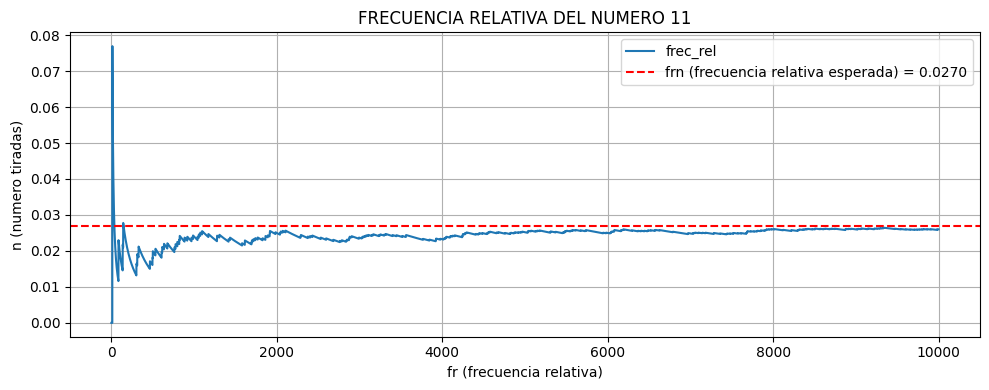

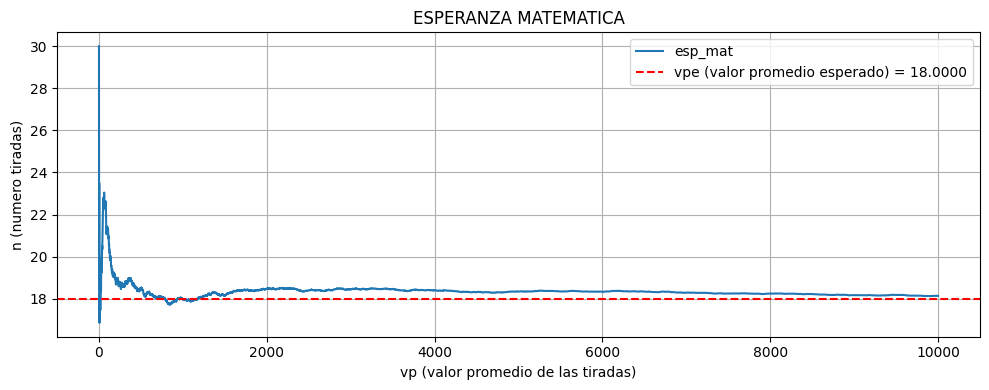

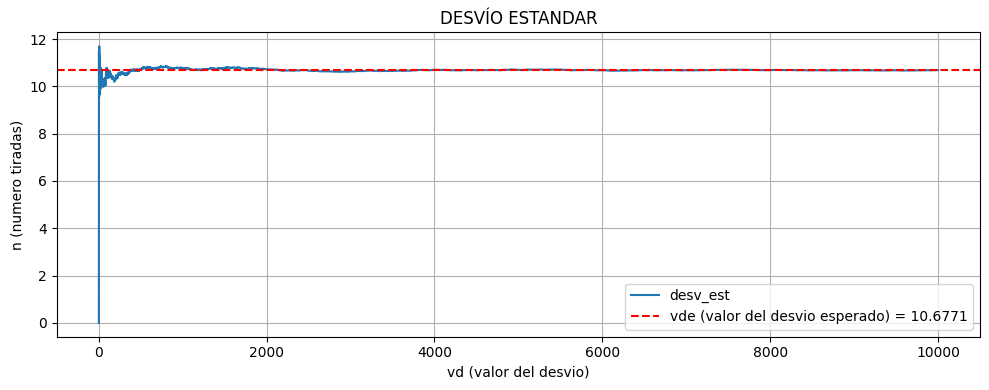

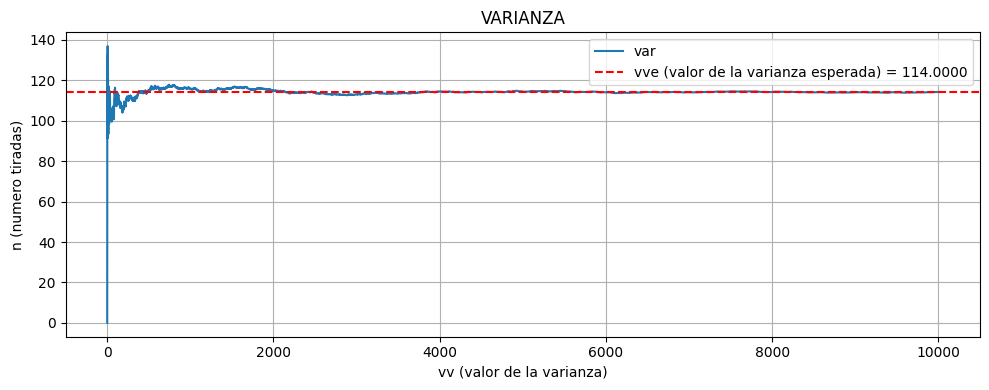

In [50]:
df.index = df.index + 1

labels = {
    'x_label_desvio': 'vd (valor del desvio)',
    'y_label_desvio': 'n (numero tiradas)',
    'x_label_varianza': 'vv (valor de la varianza)',
    'y_label_varianza': 'n (numero tiradas)',
    'x_label_frecuencia': 'fr (frecuencia relativa)',
    'y_label_frecuencia': 'n (numero tiradas)',
    'x_label_esperanza': 'vp (valor promedio de las tiradas)',
    'y_label_esperanza': 'n (numero tiradas)',
}

titles = {
    'title_desvio': 'DESVÍO ESTANDAR',
    'title_varianza': 'VARIANZA',
    'title_frecuencia': f'FRECUENCIA RELATIVA DEL NUMERO {numero_elegido}',
    'title_esperanza': 'ESPERANZA MATEMATICA',
}

valores_esperados = {
    'desvio': 'vde (valor del desvio esperado)',
    'varianza': 'vve (valor de la varianza esperada)',
    'frecuencia': 'frn (frecuencia relativa esperada)',
    'esperanza': 'vpe (valor promedio esperado)',
}

col_to_keys = {
    'desv_est': {
        'title': titles['title_desvio'],
        'xlabel': labels['x_label_desvio'],
        'ylabel': labels['y_label_desvio'],
        'esperado_label': valores_esperados['desvio']
    },
    'var': {
        'title': titles['title_varianza'],
        'xlabel': labels['x_label_varianza'],
        'ylabel': labels['y_label_varianza'],
        'esperado_label': valores_esperados['varianza']
    },
    'frec_rel': {
        'title': titles['title_frecuencia'],
        'xlabel': labels['x_label_frecuencia'],
        'ylabel': labels['y_label_frecuencia'],
        'esperado_label': valores_esperados['frecuencia']
    },
    'esp_mat': {
        'title': titles['title_esperanza'],
        'xlabel': labels['x_label_esperanza'],
        'ylabel': labels['y_label_esperanza'],
        'esperado_label': valores_esperados['esperanza']
    }
}

lineas_horizontales = {
    'desv_est': desviacion_estandar_esperada,
    'var': varianza_esperada,
    'esp_mat': esperanza_matematica_esperada,
    'frec_rel': 1/37
}

columns_to_plot = df.columns.drop('tiradas')

for col in columns_to_plot:
    plt.figure(figsize=(10, 4))
    sns.lineplot(x=df.index, y=df[col], label=col)

    title = col_to_keys.get(col, {}).get('title', col)
    xlabel = col_to_keys.get(col, {}).get('xlabel', 'Índice')
    ylabel = col_to_keys.get(col, {}).get('ylabel', col)
    valor_esperado_label = col_to_keys.get(col, {}).get('esperado_label', None)

    if col in lineas_horizontales:
        valor_esperado = lineas_horizontales[col]
        plt.axhline(valor_esperado, color='red', linestyle='--', label=f'{valor_esperado_label} = {valor_esperado:.4f}')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


